In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('letterdata.csv')

In [4]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:
df.shape

(20000, 17)

In [6]:
df.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [7]:
# Separate the input and output variables
x = df.drop('letter', axis = 1)  # input data
y = df['letter']                 # output data

<Axes: xlabel='count', ylabel='letter'>

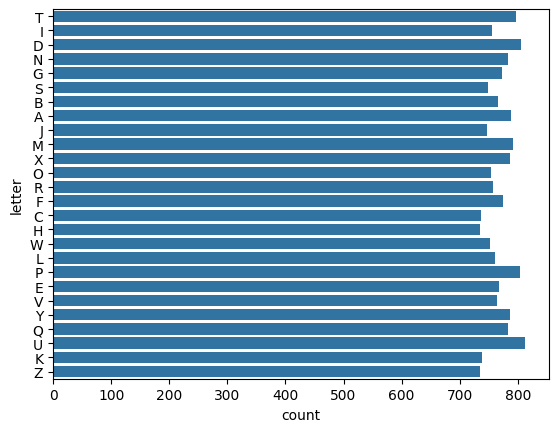

In [8]:
sns.countplot(y = y)

In [9]:
y.value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

In [10]:
x.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [11]:
# cross validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [12]:
x_train.shape

(16000, 16)

In [13]:
x_test.shape

(4000, 16)

In [14]:
# Build the model
from keras.models import Sequential
from keras.layers import Input, Dense

In [16]:
# create model object
model = Sequential()

# Input layer
model.add(Input((16,)))

# Hidden layer - 1
model.add(Dense(32, activation='relu'))

# Hidden layer - 2
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(26, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │           442 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,514 (5.91 KB)

 Trainable params: 1,514 (5.91 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# One hot encoding
x = ['A','C','C','B','A','C','A','B']

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_le = le.fit_transform(x)

from keras.utils import to_categorical
to_categorical(x_le)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [27]:
# Separate the input and output variables
x = df.drop('letter', axis = 1)  # input data
y = df['letter']                 # output data

# Prepare the output variable
y_le = le.fit_transform(y)     # Label eoncode
y_new = to_categorical(y_le)   # One hot encode

# cross validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y_new, test_size=0.2, random_state=0)

In [28]:
x_train.shape

(16000, 16)

In [29]:
y_train.shape

(16000, 26)

In [30]:
# compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
             metrics = ['accuracy'])

In [32]:
# train the model
model.fit(x_train, y_train, epochs=20, batch_size=4)

Epoch 1/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.7874 - loss: 0.6914
Epoch 2/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.7955 - loss: 0.6713
Epoch 3/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.8112 - loss: 0.6281
Epoch 4/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8235 - loss: 0.5900
Epoch 5/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8291 - loss: 0.5464
Epoch 6/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.8339 - loss: 0.5399
Epoch 7/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8359 - loss: 0.5192
Epoch 8/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8426 - loss: 0.4924
Epoch 9/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.8484 - loss: 0.4788
Epoch 10/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.8604 - loss: 0.4502
Epoch 11/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.8530 - loss: 0.4549
Epoch 12/20
4000/40

In [33]:
# evaluate on testing
model.evaluate(x_test, y_test, batch_size=1)

4000/4000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8590 - loss: 0.4368


[0.4378604292869568, 0.8610000014305115]